In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\Administrator\v2g\household_power_consumption.txt"

df = pd.read_csv(
    file_path,
    sep=";",
    na_values=["?"],
    low_memory=False
)

In [3]:
df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")
df = df.drop(columns=["Date", "Time"])
df = df.set_index("datetime")

In [4]:
df = df.apply(pd.to_numeric, errors="coerce")

In [5]:
df = df.dropna()

In [6]:
df_15 = df.resample("15min").mean()
df_15.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:15:00,4.587333,0.484000,234.366667,19.700000,0.0,1.333333,16.833333
2006-12-16 17:30:00,4.140667,0.327733,234.768667,17.773333,0.0,0.733333,16.866667
2006-12-16 17:45:00,4.159333,0.028267,234.630000,17.786667,0.0,0.000000,16.866667
2006-12-16 18:00:00,4.121067,0.152533,235.566000,17.706667,0.0,19.933333,17.000000
2006-12-16 18:15:00,3.768533,0.017200,234.803333,16.226667,0.0,2.866667,16.933333


In [7]:
df_15["load_kw"] = df_15["Global_active_power"]
df_15 = df_15[["load_kw"]]

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_15["load_scaled"] = scaler.fit_transform(df_15[["load_kw"]])

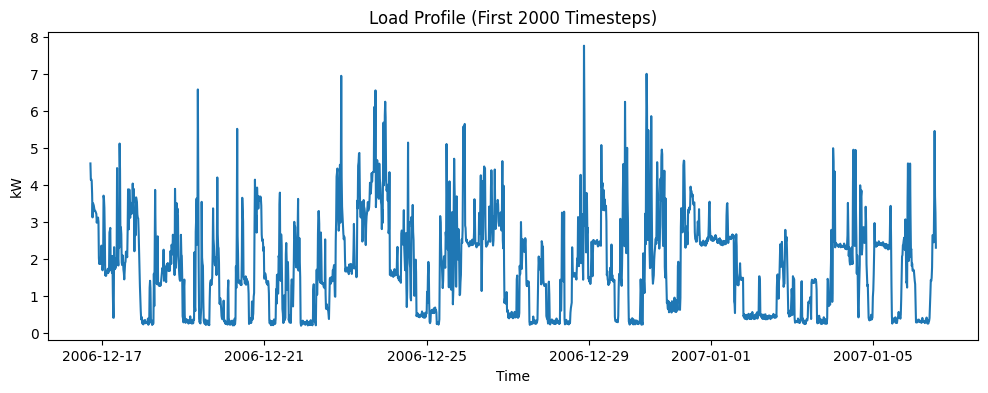

In [9]:
plt.figure(figsize=(12,4))
plt.plot(df_15["load_kw"].iloc[:2000])
plt.title("Load Profile (First 2000 Timesteps)")
plt.xlabel("Time")
plt.ylabel("kW")
plt.show()

In [10]:
clean_path = r"C:\Users\Administrator\v2g\clean_load_data_15min.csv"
df_15.to_csv(clean_path)
clean_path

'C:\\Users\\Administrator\\v2g\\clean_load_data_15min.csv'

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load your load CSV
load_df = pd.read_csv(r"C:\Users\Administrator\v2g\clean_load_data_15min.csv")

scaler_load = MinMaxScaler()
load_df["load_scaled"] = scaler_load.fit_transform(load_df[["load_kw"]])

# Save the scaler for later use
joblib.dump(scaler_load, "load_scaler.gz")

load_df.to_csv("load_scaled.csv", index=False)